In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff

In [2]:
data, meta = loadarff("seismic-bumps.arff");

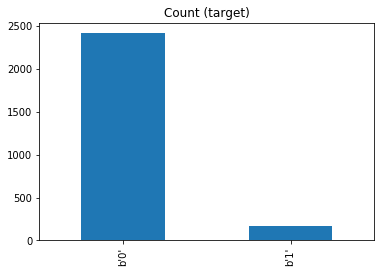

In [3]:
# Our data being very unbalanced and having a very few number of class 1 
# We will look at to oversampling after cleaning our data
df = pd.DataFrame(data);
df['class'].value_counts().plot(kind='bar', title='Count (target)');

In [4]:
print(meta) # Print Categories

Dataset: seismic-bumps
	seismic's type is nominal, range is ('a', 'b', 'c', 'd')
	seismoacoustic's type is nominal, range is ('a', 'b', 'c', 'd')
	shift's type is nominal, range is ('W', 'N')
	genergy's type is numeric
	gpuls's type is numeric
	gdenergy's type is numeric
	gdpuls's type is numeric
	ghazard's type is nominal, range is ('a', 'b', 'c', 'd')
	nbumps's type is numeric
	nbumps2's type is numeric
	nbumps3's type is numeric
	nbumps4's type is numeric
	nbumps5's type is numeric
	nbumps6's type is numeric
	nbumps7's type is numeric
	nbumps89's type is numeric
	energy's type is numeric
	maxenergy's type is numeric
	class's type is nominal, range is ('1', '0')



In [5]:
# Print types of each category
for category in data.dtype.names:
    print("category =", category, ", type = ", type(data[category][0]));

category = seismic , type =  <class 'numpy.bytes_'>
category = seismoacoustic , type =  <class 'numpy.bytes_'>
category = shift , type =  <class 'numpy.bytes_'>
category = genergy , type =  <class 'numpy.float64'>
category = gpuls , type =  <class 'numpy.float64'>
category = gdenergy , type =  <class 'numpy.float64'>
category = gdpuls , type =  <class 'numpy.float64'>
category = ghazard , type =  <class 'numpy.bytes_'>
category = nbumps , type =  <class 'numpy.float64'>
category = nbumps2 , type =  <class 'numpy.float64'>
category = nbumps3 , type =  <class 'numpy.float64'>
category = nbumps4 , type =  <class 'numpy.float64'>
category = nbumps5 , type =  <class 'numpy.float64'>
category = nbumps6 , type =  <class 'numpy.float64'>
category = nbumps7 , type =  <class 'numpy.float64'>
category = nbumps89 , type =  <class 'numpy.float64'>
category = energy , type =  <class 'numpy.float64'>
category = maxenergy , type =  <class 'numpy.float64'>
category = class , type =  <class 'numpy.bytes

### We have to convert nominal values to onehotencoded to use them in our classification

In [6]:
# Convert seismic to onehotencoded
encoded_seismic = pd.get_dummies(data['seismic'])
encoded_seismic.columns = ['seismic_a', 'seismic_b'];
print(encoded_seismic)

      seismic_a  seismic_b
0             1          0
1             1          0
2             1          0
3             1          0
4             1          0
...         ...        ...
2579          0          1
2580          0          1
2581          0          1
2582          1          0
2583          1          0

[2584 rows x 2 columns]


In [7]:
# Convert seismoacoustic to onehotencoded
encoded_seismoacoustic = pd.get_dummies(data['seismoacoustic'])
encoded_seismoacoustic.columns = ['seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c'];
print(encoded_seismoacoustic);

      seismoacoustic_a  seismoacoustic_b  seismoacoustic_c
0                    1                 0                 0
1                    1                 0                 0
2                    1                 0                 0
3                    1                 0                 0
4                    1                 0                 0
...                ...               ...               ...
2579                 1                 0                 0
2580                 1                 0                 0
2581                 1                 0                 0
2582                 1                 0                 0
2583                 1                 0                 0

[2584 rows x 3 columns]


In [8]:
# Convert shift to ones and zeros 0 for coal-getting, 1 for preparation shift);
dataframe = pd.DataFrame(data);
encoded_shift = dataframe['shift'].replace(b'W', 0);
encoded_shift = encoded_shift.replace(b'N', 1);
print(encoded_shift);

0       1
1       1
2       1
3       1
4       1
       ..
2579    0
2580    0
2581    0
2582    0
2583    0
Name: shift, Length: 2584, dtype: int64


In [9]:
# Convert ghazard to onehotencoded
encoded_ghazard = pd.get_dummies(data['ghazard'])
encoded_ghazard.columns = ['ghazard_a', 'ghazard_b', 'ghazard_c'];
print(encoded_ghazard);

      ghazard_a  ghazard_b  ghazard_c
0             1          0          0
1             1          0          0
2             1          0          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
2579          0          1          0
2580          1          0          0
2581          1          0          0
2582          1          0          0
2583          1          0          0

[2584 rows x 3 columns]


In [10]:
# Create a dataframe of the original data
dataframe = pd.DataFrame(data)

# Remove all data that we encoded from the original dataframe
dataframe = dataframe.drop('seismic', axis=1);
dataframe = dataframe.drop('seismoacoustic', axis=1);
dataframe = dataframe.drop('shift', axis=1);
dataframe = dataframe.drop('ghazard', axis=1);
dataframe = dataframe.drop('class', axis=1); # Also drop class because it already has 0 and 1 values;

X = dataframe.to_numpy();

In [11]:
# Standardize data that we did not encode
X = StandardScaler().fit_transform(X);

In [12]:
X.shape

(2584, 14)

In [13]:
# recreate a dataframe with the Standardized data and add the encoded data
dataframe = pd.DataFrame(X)
dataframe = dataframe.join(encoded_seismic)
dataframe = dataframe.join(encoded_seismoacoustic)
dataframe = dataframe.join(encoded_ghazard)
dataframe = dataframe.join(encoded_shift);

In [14]:
ydf = pd.DataFrame(data['class'].astype(dtype="int64"));
ydf.columns = ['class'];
dataframe = dataframe.join(ydf);

In [15]:
dataframe.shape

(2584, 24)

In [16]:
X = dataframe.to_numpy()

In [17]:
print(X.shape)

(2584, 24)


In [18]:
df_class_0 = [];
df_class_1 = [];

count = 0
for index, entry in enumerate(X):
    if (X[index,23] == 0):
        df_class_0.append(entry);
    else:
        df_class_1.append(entry);
        
df_class_0 = pd.DataFrame(df_class_0);
df_class_1 = pd.DataFrame(df_class_1);

In [19]:
# Oversample class 1 such that we have the same number of samples
df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
# df_class_1_over
# # concatenate the two classes
# # print(df_class_1_over)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# len(df_train_over)
print('Random over-sampling:')
print("Number of samples = ", len(df_train_over));
X = df_train_over.to_numpy()

Random over-sampling:
Number of samples =  4828


In [20]:
# Separate the dataset into a training and a test set and keep the class included in the set
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1);

In [21]:
y_train = X_train[:,23];
y_test = X_test[:,23];

In [22]:
# Remove last row of X_train and X_test because it includes the class
X_train = np.delete(X_train, 23, 1);
X_test = np.delete(X_test,23,1);
y_train = y_train.astype("int64");

In [23]:
print(type(y_train[0]))

<class 'numpy.int64'>


In [24]:
print(X_train.shape);
print(X_test.shape);

(3862, 23)
(966, 23)


## Building and Training the neural network

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
from keras.utils.vis_utils import plot_model
np.random.seed(1);

Using TensorFlow backend.


In [32]:
n_h=100; n_o=1; lrate=1; nepochs=50; isVerbose=1;
n_i = X_train.shape[1] # 23 distinct features in our data not
model = Sequential()
model.add(Dense(n_h, input_dim=n_i, activation="relu"));
model.add(Dense(n_o, activation = "sigmoid"));

model.compile(optimizer=optimizers.SGD(lr=lrate), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=nepochs, batch_size=64, verbose=isVerbose)

Epoch 1/50
3862/3862 [==============================] - 0s 30us/step - loss: 0.5709 - accuracy: 0.7160
Epoch 2/50
3862/3862 [==============================] - 0s 17us/step - loss: 0.5410 - accuracy: 0.7361
Epoch 3/50
3862/3862 [==============================] - 0s 16us/step - loss: 0.5212 - accuracy: 0.7478
Epoch 4/50
3862/3862 [==============================] - 0s 17us/step - loss: 0.5099 - accuracy: 0.7512
Epoch 5/50
3862/3862 [==============================] - 0s 17us/step - loss: 0.5020 - accuracy: 0.7550
Epoch 6/50
3862/3862 [==============================] - 0s 17us/step - loss: 0.4993 - accuracy: 0.7646
Epoch 7/50
3862/3862 [==============================] - 0s 18us/step - loss: 0.4875 - accuracy: 0.7659
Epoch 8/50
3862/3862 [==============================] - 0s 17us/step - loss: 0.4787 - accuracy: 0.7773
Epoch 9/50
3862/3862 [==============================] - 0s 18us/step - loss: 0.4667 - accuracy: 0.7784
Epoch 10/50
3862/3862 [==============================] - 0s 17us/step - l

In [32]:
yPredicted = model.predict_classes(X_test);

In [34]:
# Count number of correct predictions on test data
correct_values_count = 0
count = 0
for index,val in enumerate(yPredicted):
    if (yPredicted[index][0] == y_test[index]):
        correct_values_count += 1;
    if (yPredicted[index][0] == 1):
        count+=1;
print("Correct predictions on test data:", correct_values_count / len(y_test) * 100, "%")

Correct predictions on test data: 90.52224371373308 %
